In [13]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [15]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.sample(100)


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
43,Czechia,1.0,76.76875,71.8125,0.000,13.026000,97.285714,22.9375,55.71250,0.0000,98.0000,98.1250,0.000000e+00,NaN,NaN
162,Suriname,0.0,70.08125,166.0000,0.000,4.984000,85.272727,0.0000,50.15625,0.0000,78.2500,82.5625,1.085490e+09,1.909166e+05,11.82500
6,Armenia,0.0,73.40000,117.3750,1.000,3.702667,87.562500,274.2500,44.70625,1.0000,89.1250,87.3750,2.901137e+09,1.015165e+06,11.78750
145,SanMarino,0.0,NaN,NaN,0.000,0.010000,69.000000,0.0000,NaN,0.0000,69.0000,69.0000,0.000000e+00,NaN,15.10000
128,Panama,0.0,76.48750,115.8750,1.125,6.212000,78.666667,0.2500,49.31250,1.6875,84.6875,80.0000,1.385038e+10,1.955022e+06,12.77500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,Angola,0.0,49.01875,328.5625,83.750,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
68,Guatemala,0.0,71.73125,131.1875,13.125,2.268667,87.090909,0.0000,40.44375,16.1250,71.4375,85.5625,1.769152e+10,5.933908e+06,9.86250
143,SaintVincentandtheGrenadines,0.0,73.47500,152.0625,0.000,6.110000,93.000000,0.0000,41.99375,0.0000,97.8750,98.3125,0.000000e+00,NaN,13.18125
140,Rwanda,0.0,59.31250,246.8125,20.750,5.636000,96.000000,505.8750,14.75000,32.0625,88.5000,89.3750,9.398193e+08,3.735507e+06,9.28750


In [51]:
dfLE.dtypes


Country              object
isDeveloped         float64
Lifeexpectancy      float64
AdultMortality      float64
infantdeaths        float64
Alcohol             float64
HepatitisB          float64
Measles             float64
BMI                 float64
under-fivedeaths    float64
Polio               float64
Diphtheria          float64
GDP                 float64
Population          float64
Schooling           float64
dtype: object

<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [36]:
#Part 1
GDPC=dfLE[["GDP"]]
dfLE[["GDP"]].sample(n=10, random_state=1)

,GDP
31,7.638220e+08
66,3.735905e+10
113,3.590148e+09
154,2.480334e+09
81,6.559575e+08
122,1.031998e+11
35,1.034282e+11
103,3.305844e+09
183,1.750809e+10
99,3.660179e+09


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

In [100]:
#Print all distributions
# Graphing Helper Function
def bigGraph(df_in, columnName, rnd=0):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data, rnd))
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.Hist(hist)
    thinkplot.axvline(np.mean(hist), color="green")
    thinkplot.axvline(np.median(hist), color="red")
    thinkplot.SubPlot(2)
    thinkplot.Pmf(pmf)
    thinkplot.Pmf(pmf, color="red")
    thinkplot.SubPlot(3)
    thinkplot.Cdf(cdf)
    thinkplot.Cdf(cdf, color="green")
    thinkplot.SubPlot(4)
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5)
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6)
    pdf = thinkstats2.EstimatedPdf(data)
    thinkplot.Pdf(pdf)
    thinkplot.Config()
    return

c:\Users\Nneka\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Nneka\Desktop\Data Analytics\DATA 3450\Assignment\Assignment2\BSIP_Assignment_2_Students\thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


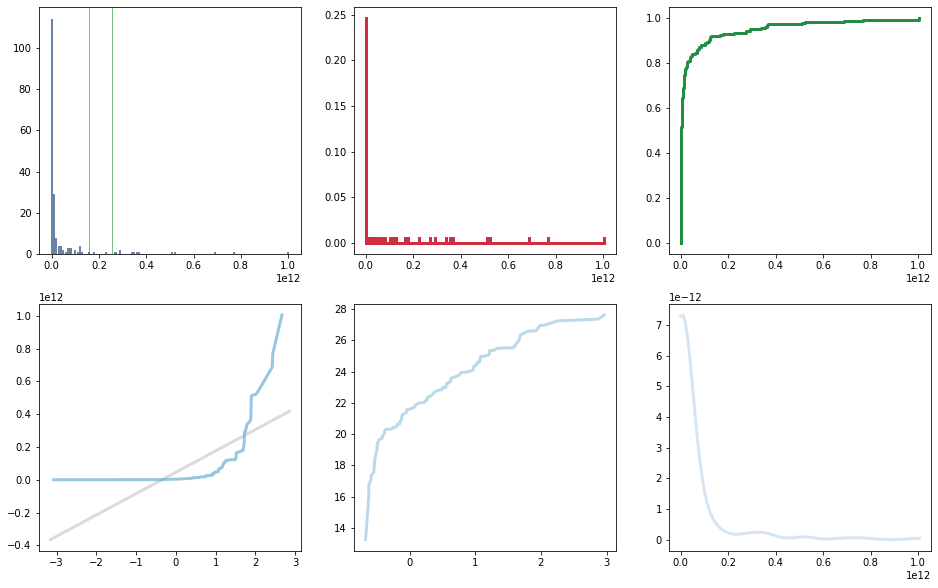

In [101]:
bigGraph(dfLE, 'GDP', -10)

c:\Users\Nneka\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Nneka\Desktop\Data Analytics\DATA 3450\Assignment\Assignment2\BSIP_Assignment_2_Students\thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


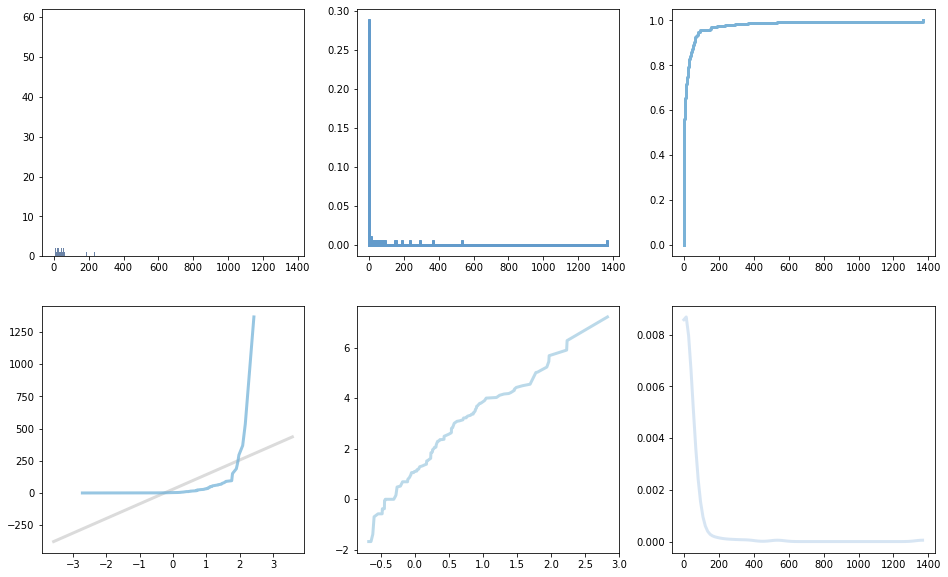

In [52]:
bigGraph(dfLE, 'infantdeaths', )

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

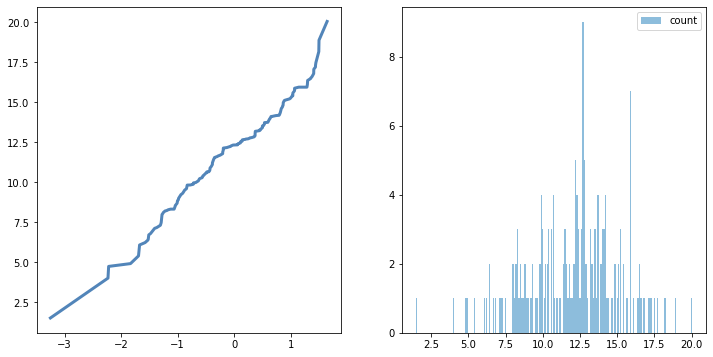

In [36]:
#Analytical for Schooling
#Histogram

thinkplot.clf()
hi = thinkstats2.Hist(round(dfLE["Schooling"], 1), label="count")
thinkplot.PrePlot(2, 1, 2)
thinkstats2.NormalProbabilityPlot(dfLE["Schooling"])
thinkplot.SubPlot(2)
thinkplot.Hist(hi)
thinkplot.Config()

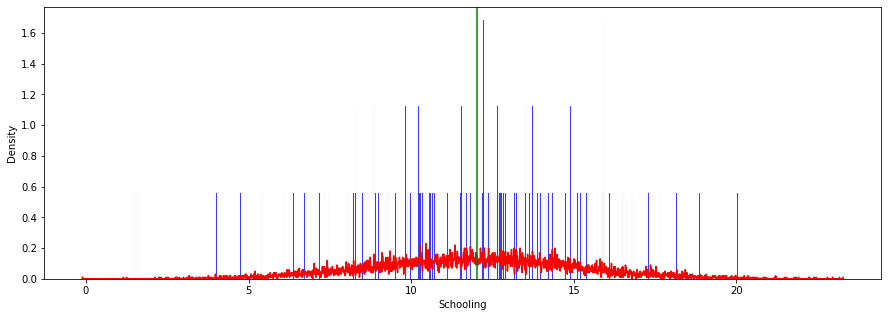

In [39]:
#Create a normal distribution based on the characteristics of the kinda-normal data
import scipy.stats
mu = dfLE["Schooling"].mean()
sigma = dfLE["Schooling"].std()
normz = scipy.stats.norm(mu, sigma)
normz
sns.histplot(data=normz.rvs(10000), binwidth=.01, color="red", stat="density", kde=True, element="poly", fill=False)
sns.histplot(data=dfLE["Schooling"], binwidth=.01, color="blue", stat="density")
plt.axvline(mu, color="green")

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

In [ ]:
#Analytical for GDP/capita

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [ ]:
#Visualize correlations. 

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [ ]:
#Calculate correlations and analyze. 